Парсер сайта одежды https://outmaxshop.ru/snickers 

---
Результатом мы получаем: Название товара, цену товара со скидкой, скидку в процентах , цену товара без скидки 

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir Результат

In [ ]:
!cp data.csv

cp: missing destination file operand after 'data.csv'
Try 'cp --help' for more information.


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import os

In [ ]:
!cp data.csv 


cp: missing destination file operand after 'data.csv'
Try 'cp --help' for more information.


In [ ]:
!touch /content/Результат/file1.csv

In [ ]:
HOST = 'https://outmaxshop.ru/'
URL =  'https://outmaxshop.ru/clothes'

In [ ]:
CSV = '/content/Результат/file1.csv'

In [ ]:
HEADERS = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36 OPR/92.0.0.0'
}

In [ ]:
def get_html(url, params=''):
  r = requests.get(url, headers= HEADERS,params=params)
  return r

In [ ]:
def get_content(html):
  soup = BeautifulSoup(html, 'html.parser')
  items = soup.find_all('a', class_ ='catalog-product__item')
  clothes = []


  for item in items:
    clothes.append(
        {
            'name':item.find('div', class_ ='catalog-item__name catalog-item__name--catalog').get_text(strip =True),
            'price_y_dis':item.find('div', class_ ='catalog-item__price catalog-item__price--catalog catalog-item__price--red').get_text(strip =True),
            'dis':item.find('div', class_ ='catalog-product__label').get_text(strip =True),
            'price_n_dis':item.find('div', class_ ='catalog-item__price catalog-item__price--catalog catalog-item__price--line').get_text(strip =True),
            
            
        }
    )
  return clothes

In [ ]:
def save_doc(items,path):
  with open(path,'w', newline='') as file:
    writer =csv.writer(file,delimiter=';')
    writer.writerow(['Название','Цена со скидкой', 'Скидка','Цена без скидки'])
    for item in items:
      writer.writerow([item['name'],item['price_y_dis'], item['dis'],item['price_n_dis']])


In [ ]:
def parser():
  PAGENATTION = 400
  
  html = get_html(URL)
  if html.status_code == 200:
    cards = []
    for page in range(1,PAGENATTION,40):
      print(f'Происходит парсинг страницы:{(round(page//40))+1}')
      html = get_html(URL, params = {'page': page})
      cards.extend(get_content(html.text))
      save_doc(cards,CSV)
    print(cards)
  else:
    print("САйт полёг!!!")
  


In [ ]:
html = get_html(URL)
print(get_content(html.text))
print(html)

[{'name': 'Куртка Nike цвет зеленый', 'price_y_dis': '3 770₽', 'dis': '-15%', 'price_n_dis': '4 390₽'}, {'name': 'Куртка зимняя Adidas цвет черный', 'price_y_dis': '3 770₽', 'dis': '-15%', 'price_n_dis': '4 390₽'}, {'name': 'Куртка зимняя The North Face цвет черный', 'price_y_dis': '4 960₽', 'dis': '-15%', 'price_n_dis': '5 790₽'}, {'name': 'Куртка зимняя Puma цвет белый', 'price_y_dis': '4 960₽', 'dis': '-15%', 'price_n_dis': '5 790₽'}, {'name': 'Куртка зимняя Puma цвет черный', 'price_y_dis': '4 960₽', 'dis': '-15%', 'price_n_dis': '5 790₽'}, {'name': 'Куртка зимняя Diesel цвет черный', 'price_y_dis': '7 010₽', 'dis': '-15%', 'price_n_dis': '8 290₽'}, {'name': 'Куртка зимняя Diesel цвет зеленый', 'price_y_dis': '7 010₽', 'dis': '-15%', 'price_n_dis': '8 290₽'}, {'name': 'Куртка The North Face цвет белый', 'price_y_dis': '6 470₽', 'dis': '-15%', 'price_n_dis': '7 590₽'}, {'name': 'Худи Jordan цвет синий', 'price_y_dis': '3 230₽', 'dis': '-15%', 'price_n_dis': '3 790₽'}, {'name': 'Курт

In [ ]:
parser()

Происходит парсинг страницы:1
Происходит парсинг страницы:2
Происходит парсинг страницы:3
Происходит парсинг страницы:4
Происходит парсинг страницы:5
Происходит парсинг страницы:6
Происходит парсинг страницы:7
Происходит парсинг страницы:8
Происходит парсинг страницы:9
Происходит парсинг страницы:10
[{'name': 'Куртка Nike цвет зеленый', 'price_y_dis': '3 770₽', 'dis': '-15%', 'price_n_dis': '4 390₽'}, {'name': 'Куртка зимняя Adidas цвет черный', 'price_y_dis': '3 770₽', 'dis': '-15%', 'price_n_dis': '4 390₽'}, {'name': 'Куртка зимняя The North Face цвет черный', 'price_y_dis': '4 960₽', 'dis': '-15%', 'price_n_dis': '5 790₽'}, {'name': 'Куртка зимняя Puma цвет белый', 'price_y_dis': '4 960₽', 'dis': '-15%', 'price_n_dis': '5 790₽'}, {'name': 'Куртка зимняя Puma цвет черный', 'price_y_dis': '4 960₽', 'dis': '-15%', 'price_n_dis': '5 790₽'}, {'name': 'Куртка зимняя Diesel цвет черный', 'price_y_dis': '7 010₽', 'dis': '-15%', 'price_n_dis': '8 290₽'}, {'name': 'Куртка зимняя Diesel цвет з

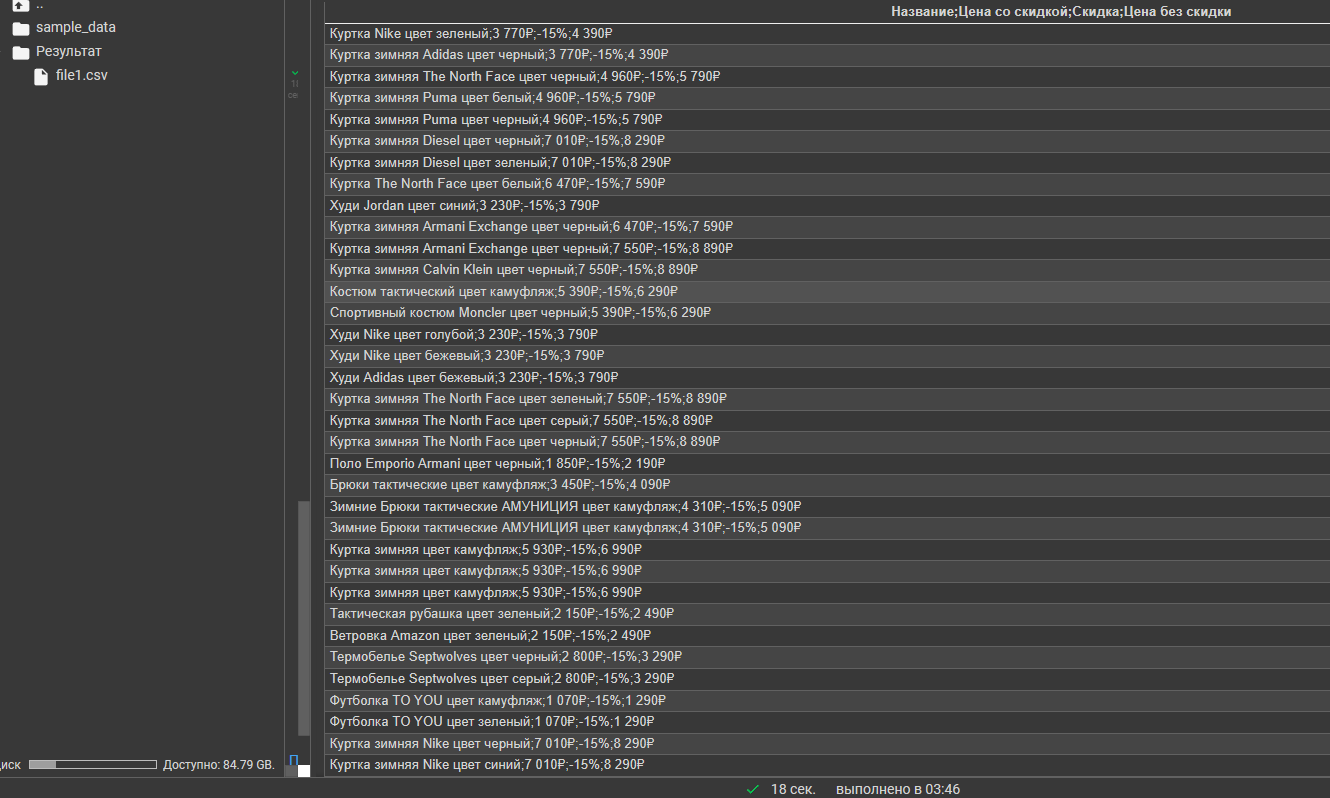

Пример результата парсинга